<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/18BCE247_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the libraries

import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the Data

X, y = datasets.load_boston(return_X_y = True)
print('Shape of Independent Variables : ', X.shape)
print('Shape of Dependent Variables : ', y.shape)

Shape of Independent Variables :  (506, 13)
Shape of Dependent Variables :  (506,)


In [ ]:
# Data Preprocessing

X_train_tmp = X[0:400, :]
X_train = np.ones((X_train_tmp.shape[0], X_train_tmp.shape[1] + 1))
X_test_tmp = X[400:506, :]
y_train = y[0:400]
y_test = y[400:506]
X_train[:, 1:] = X_train_tmp
X_test = np.ones((X_test_tmp.shape[0], X_test_tmp.shape[1] + 1))
X_test[:, 1:] = X_test_tmp

# Scale the model

scalar = StandardScaler()
scalar.fit(X_train[:, 1:])
X_train[:, 1:] = scalar.transform(X_train[:, 1:])
X_test[:, 1:] = scalar.transform(X_test[:, 1:])

In [ ]:
# Implement the algorithm

theta = np.random.randn(X_train.shape[1])
theta

array([-0.97675453, -0.58010578, -0.40270062, -2.01323984,  0.06357485,
       -0.31243037, -0.13349318, -1.25711901,  1.4253557 ,  0.51157767,
        0.54865709,  0.4971723 ,  1.54104828, -0.6657504 ])

In [ ]:
alpha = 0.01
epochs = 1000
m = X_train.shape[0]
n = X_train.shape[1]
J_history = []

for i in range(epochs):
  y_predicted = np.dot(X_train, theta)
  error = y_predicted - y_train
  updates = np.zeros(n)

  for j in range(n):
    updates[j] = np.sum(error * X_train.T[j])
  theta -= alpha / m * (updates)
  J_history.append(metrics.mean_squared_error(y_true = y_train, y_pred = y_predicted))
theta

array([24.33340728, -1.01516962,  0.8721652 , -0.0914285 ,  0.56726745,
       -1.13148456,  3.72621081, -0.05796637, -2.53347074,  2.02184196,
       -1.01810071, -1.65652098,  0.06277173, -3.46869226])

In [ ]:
# Evaluate the model
mse = metrics.mean_squared_error(y_true = y_train, y_pred = y_predicted)
print('Mean Squared Error : ', mse)

Mean Squared Error :  22.610471567167124


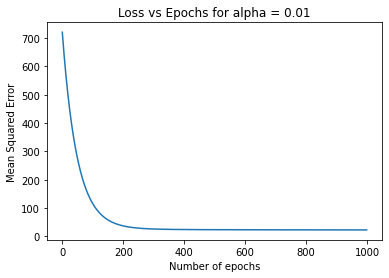

In [ ]:
plt.plot(J_history)
plt.xlabel('Number of epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss vs Epochs for alpha = 0.01')
plt.show()

In [ ]:
# Predicting new data

y_test_predicted = np.dot(X_test, theta)
print('Mean Squared Error on Test Data : ', metrics.mean_squared_error(y_true = y_test, y_pred = y_test_predicted))

Mean Squared Error on Test Data :  32.622508595703216


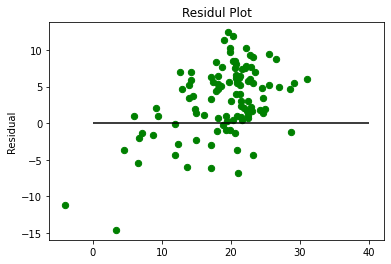

In [ ]:
# Residual plot to evaluate the model

plt.scatter(y_test_predicted, y_test_predicted - y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 40)
plt.title('Residul Plot')
plt.ylabel('Residual')
plt.show()

In [ ]:
# Plot for different alphas

def gradient(alpha):
  epochs = 1000
  theta = np.random.randn(X_train.shape[1])
  m = X_train.shape[0]
  n = X_train.shape[1]
  J_history = []


  for i in range(epochs):
    y_predicted = np.dot(X_train, theta)
    error = y_predicted - y_train
    updates = np.zeros(n)

    for j in range(n):
      updates[j] = np.sum(error * X_train.T[j])
    theta -= alpha / m * (updates)
    J_history.append(metrics.mean_squared_error(y_true = y_train, y_pred = y_predicted))
  return J_history

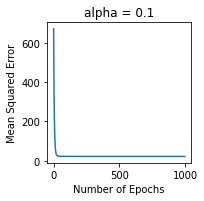

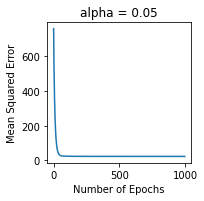

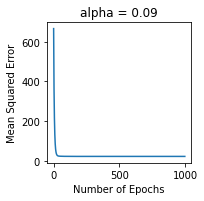

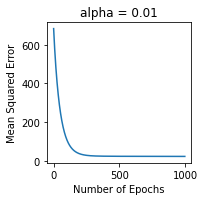

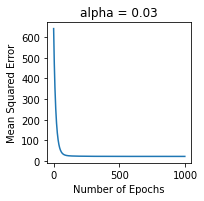

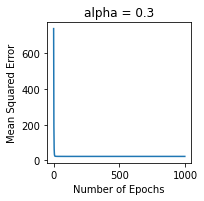

In [ ]:
alphas = [0.1, 0.05, 0.09, 0.01, 0.03, 0.3]
for i in range(len(alphas)):
  plt.figure(figsize = (15, 15))
  J = gradient(alphas[i])
  plt.subplot(5, 5, i+1)
  title = 'alpha = ' + str(alphas[i])
  plt.title(title)
  plt.ylabel('Mean Squared Error')
  plt.xlabel('Number of Epochs')
  plt.plot(J)
  plt.show()

In [63]:
# Normal Equation without Regularisation

X_tmp = np.linalg.inv(np.dot(X_train.T, X_train))
x = np.dot(X_tmp, X_train.T)
norm_theta = np.dot(x, y_train)
print(norm_theta)

predict = np.dot(X_test, norm_theta)

print('Mean Squared Error : ', metrics.mean_squared_error(y_true = y_test, y_pred = predict))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_true = y_test, y_pred = predict))

[24.3345     -1.14370921  1.12191092  0.35913222  0.48497247 -1.7061696
  3.58169796  0.07554815 -2.8156326   3.05189603 -1.97502535 -1.7937352
 -0.05252128 -3.50239563]
Mean Squared Error :  37.89377859960208
Mean Absolute Error :  5.142232214465305


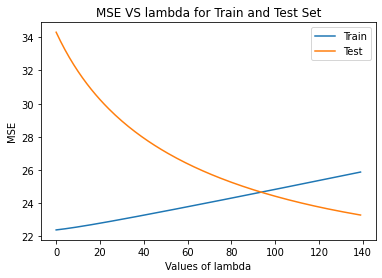

In [68]:
# Normal Equation with Regularisation

matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for i in range(1, X_train.shape[1]):
  matrix[i, i] = 1

train_mse = []
test_mse = []

for lam in range(10, 150):
  X_tmp = np.linalg.inv(np.dot(X_train.T, X_train) + lam * matrix) # Regularisation
  x = np.dot(X_tmp, X_train.T)
  thetas = np.dot(x, y_train)
  
  y_train_predict = np.dot(X_train, thetas)
  mse_train = metrics.mean_squared_error(y_true = y_train, y_pred = y_train_predict)
  train_mse.append(mse_train)

  predict = np.dot(X_test, thetas)
  mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = predict)
  test_mse.append(mse_test)

plt.plot(train_mse)
plt.plot(test_mse)
plt.title('MSE VS lambda for Train and Test Set')
plt.xlabel('Values of lambda')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'])
plt.show()